In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftfreq
from scipy.io.wavfile import write, read

In [2]:
#Definimos frecuencia
f = 1
fs = 6 # Medidas por segundos

In [3]:
t = np.linspace(0, 1, 2*fs, endpoint=False)

#Señal periodica
x = np.cos(2*np.pi*f*t)

#Señal no periodica
x1 = np.sin(np.sqrt(t))


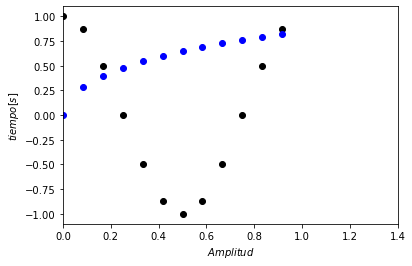

In [4]:
plt.figure()
plt.scatter(t, x, c='black')
plt.scatter(t,x1, c='blue')
plt.xlim(0,1.4)
plt.xlabel(r'$Amplitud$')
plt.ylabel(r'$tiempo[s]$')
plt.show()

In [5]:
def getFFT(x):
    Npoints = len(x)
    c = (2*np.pi)/len(x)
    fft = []
    for k in range(Npoints):
        Re = 0
        Im = 0
        for n in range(Npoints):
            Re += x[n]*np.cos(c*k*n)
            Im += x[n]*np.sin(c*k*n)
        fft = np.append(fft, complex(Re,Im))
    return fft

In [6]:
Xw = getFFT(x)
print(Xw)

[-1.55431223e-15+0.00000000e+00j  6.00000000e+00+5.55111512e-16j
 -1.05471187e-15+6.66133815e-16j -1.62208617e-15+9.99200722e-16j
  8.32667268e-16+0.00000000e+00j -1.33226763e-15+2.83106871e-15j
 -3.33066907e-16+3.81152838e-15j  1.11022302e-16+8.32667268e-16j
 -6.10622664e-16+1.55431223e-15j  3.37571461e-15+2.33146835e-15j
  1.39888101e-14+3.21964677e-15j  6.00000000e+00-1.69309011e-14j]


In [7]:
#FFT de numpy
Xw1 = fft(x)
print(Xw1)

[-1.39922116e-15+0.00000000e+00j  6.00000000e+00-1.79924159e-15j
  3.16753709e-16+4.80740672e-17j  4.44089210e-16-6.43249060e-16j
  5.15913559e-16+3.36518470e-16j  2.51792941e-16+3.39930489e-16j
 -2.66113379e-16+6.16297582e-33j  4.44089210e-16-4.64759042e-16j
  5.15913559e-16-3.36518470e-16j  6.36385478e-16+7.24523026e-16j
  3.16753709e-16-4.80740672e-17j  6.00000000e+00+1.84279618e-15j]


In [8]:
# Implementar la transformada inversa
def getIFFT(x):
    Npoints = len(x)
    c = (2*np.pi)/len(x)
    ifft = []
    for k in range(Npoints):
        Re = 0
        Im = 0
        for n in range(Npoints):
            Re += x[n]*np.cos(c*k*n)
            Im += x[n]*np.sin(c*k*n)
        ifft = np.append(ifft, complex(Re,Im)/Npoints)
    return ifft
    

In [9]:
Xt = ifft(Xw)
Xt1 = getIFFT(Xw)

Text(0, 0.5, '$tiempo[s]$')

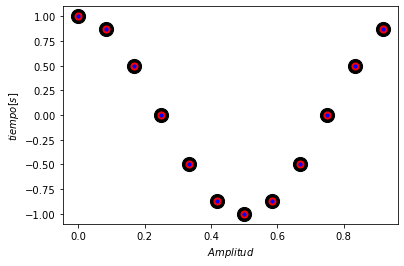

In [10]:
# Comparar resultados
plt.figure()
plt.scatter(t,x,c='black', s=200)
plt.scatter(t,Xt.real, c='red', s=50)
plt.scatter(t, Xt1.real, c='blue', s=10)

plt.xlabel(r'$Amplitud$')
plt.ylabel(r'$tiempo[s]$')

In [11]:
#Ver la transformada en el espacio de las frecuencias
#Espacio reciproco

N = len(Xw)
frecuencias = np.fft.fftfreq(N)
print(frecuencias)


[ 0.          0.08333333  0.16666667  0.25        0.33333333  0.41666667
 -0.5        -0.41666667 -0.33333333 -0.25       -0.16666667 -0.08333333]


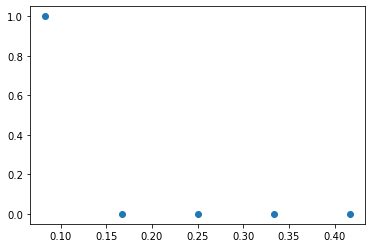

In [12]:
mask = frecuencias > 0.0
plt.scatter(frecuencias[mask], 2.0*np.abs(Xw[mask])/N)
plt.show()

In [13]:
def Sampler(f, Npoints=30, N_T=1):
    T = 2*np.pi
    #calcular frecuencia angular
    omega = 2.0 * np.pi / T
    deltat = T/Npoints
    t = np.arange(Npoints) * deltat * N_T
    x = f(t)
    tModel = np.linspace(t.min(), t.max(), 1000)
    xModel = f( omega*tModel )
    return t,x,tModel,xModel

In [14]:
def f(t):
    return np.sin(t) + 2.0*np.sin(3*t) + 3*np.sin(5*t)

In [15]:
# Muestrear f(t)
t,x, tModel, xModel = Sampler(f)

<ipython-input-16-849c883c9e65>:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(frecuencias[mask], 2.0*np.abs(Xw[mask]/N))


Text(0.5, 1.0, 'N=15')

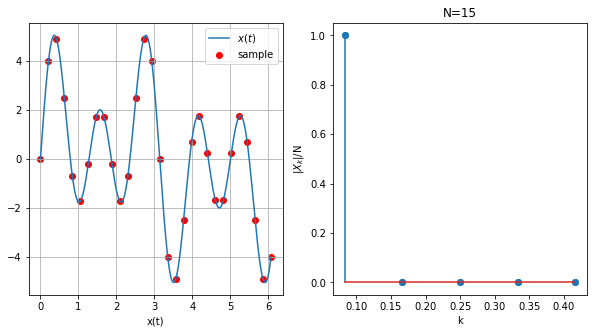

In [16]:
fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

plt.plot(tModel, xModel, label=r'$x(t)$')
plt.scatter(t,x, c='r' ,label='sample')
plt.xlabel(r't')
plt.xlabel(r'x(t)')
plt.grid()
plt.legend()

mask = frecuencias > 0.

plt.subplot(1,2,2)
plt.scatter(frecuencias[mask], 2.0*np.abs(Xw[mask]/N))
plt.stem(frecuencias[mask], 2.0*np.abs(Xw[mask]/N))
plt.xlabel('k')
plt.ylabel('|$X_k$|/N')
plt.title("N=15")

In [17]:
Xw = fft(x)
N = len(x)
frecuencias = np.fft.fftfreq(N)

# Señal armónica

In [18]:
# frecuencia
f = 440 

# Samplig rate
fs = 44100

# Amplitud max
Amax = 32767

In [19]:
t = np.linspace(0.,7.,2*fs, endpoint=False)
x = np.sin( 2.*np.pi*f *t)
print(x)

[ 0.          0.21765656  0.42487667 ... -0.6117243  -0.42487667
 -0.21765656]


In [20]:
# Vamos escalar la señal

scaled = np.int16( x*Amax )
print( scaled.min() ,scaled.max() )
write('Test440.wav',44100, scaled)

-32766 32766


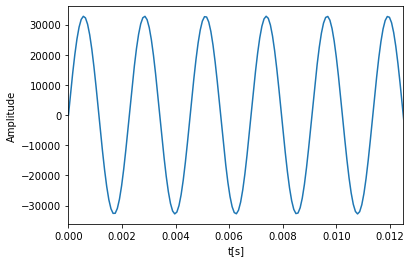

In [21]:
fig, ax = plt.subplots()
ax.plot(t,scaled)
ax.set_xlabel('t[s]')
ax.set_ylabel('Amplitude')
ax.set_xlim(0,1/80.)
plt.show()

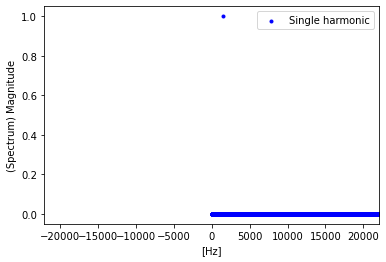

In [22]:
# Vamos a encontrar el espectro de frecuencias
X = fft(x)
X = X * 2 / len(x)
freqs = fftfreq(len(x)) * fs

mask = freqs >= 0

fig, ax = plt.subplots()
ax.scatter(freqs[mask], np.abs(X[mask]), 
           c="b", label="Single harmonic", marker=".")
ax.legend(loc=0)

ax.set_xlabel('[Hz]')
ax.set_ylabel('(Spectrum) Magnitude')
ax.set_xlim(-fs/2,fs/2)
plt.show()

# Señal mezclada

In [23]:
f0 = 440
fs = 44100 # Sampling rate

In [24]:
# Superponer varias señales
f = np.array([2.,3.,4.,8.,12.])
f *= f0
Amp = np.array([0.3,0.4,0.2,0.2,0.1])

In [25]:
t = np.linspace(0.,2.,2*fs, endpoint=False)
x = np.sin( 2.*np.pi*f0*t )

for i in range(len(f)):
    x += Amp[i]*np.sin(2.*np.pi*f[i]*t)

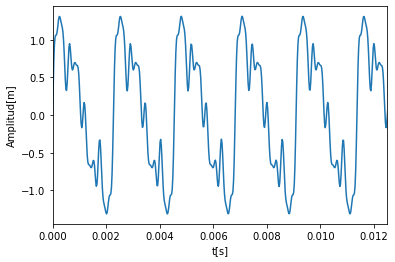

In [26]:
fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('t[s]')
ax.set_ylabel('Amplitud[m]')
ax.set_xlim(0,1./80.)
plt.show()

In [27]:
scaled = np.int16( x*Amax/np.max(np.abs(x)) )
write('Test_MixSignal.wav', 44100, scaled)

In [28]:
# Calculando las frecuencias

X = fft(x)
X = X * 2 /len(x)
frecuencias = fftfreq(len(x))*fs

In [29]:
# Aplicando las mascaras
mask = freqs < 2000

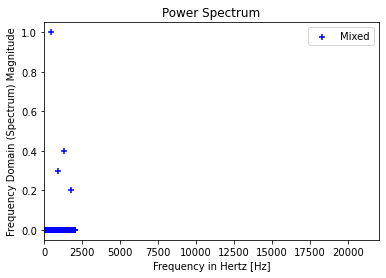

In [30]:
fig, ax = plt.subplots()
ax.scatter(frecuencias[mask], np.absolute(X[mask]), c="b", label="Mixed", marker="+")
ax.legend(loc=0)

ax.set_title('Power Spectrum')
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, fs/2)
plt.show()

# Sonido de la radiación cósmica de fondo

In [31]:
x = np.random.uniform(-1., 1., fs * 2)
scaled = np.int16(x*Amax)
write('Test_CosmicMicroBackground.wav', 44100, scaled)

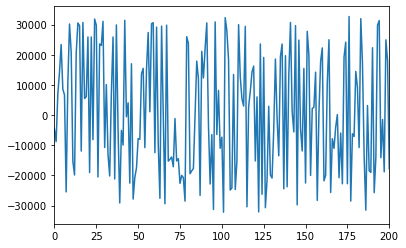

In [32]:
plt.plot(scaled)
plt.xlim(0,200)
plt.show()

In [33]:
# Calculando el espectro de frecuencias
# Calculando las frecuencias
X = fft(x)
X = X * 2 /len(x)
frecuencias = fftfreq(len(x))*fs
mask = frecuencias >= 0

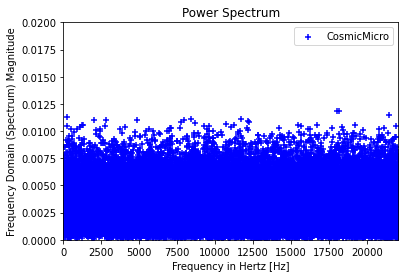

In [34]:
fig, ax = plt.subplots()
ax.scatter(frecuencias[mask], np.absolute(X[mask]), c="b", label="CosmicMicro", marker="+")
ax.legend(loc=0)

ax.set_title('Power Spectrum')
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, fs/2)
ax.set_ylim(0, 0.02)
plt.show()